In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
from IPython.display import Image, display, HTML
from tqdm import tqdm


In [18]:
T=2.0
N=150
is_dis = True

data = np.loadtxt("data_graph\config_N150_T3.00_p0.02_dis.dat")[100000:]
J0 = np.loadtxt("data_graph\interaction_N150_T3.00_p0.02_dis.dat")

In [19]:
cov_matrix = np.cov(data.T)

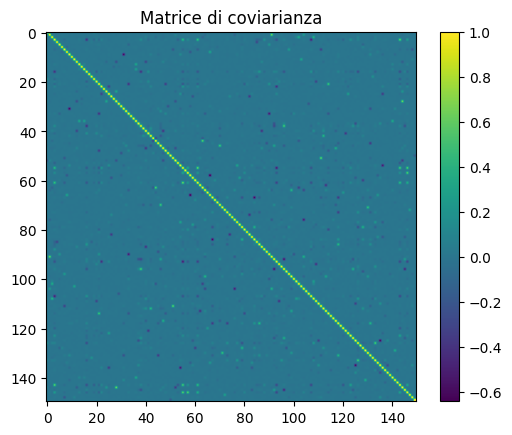

In [20]:
plt.imshow(cov_matrix)
plt.colorbar()
plt.title("Matrice di coviarianza")
plt.show()

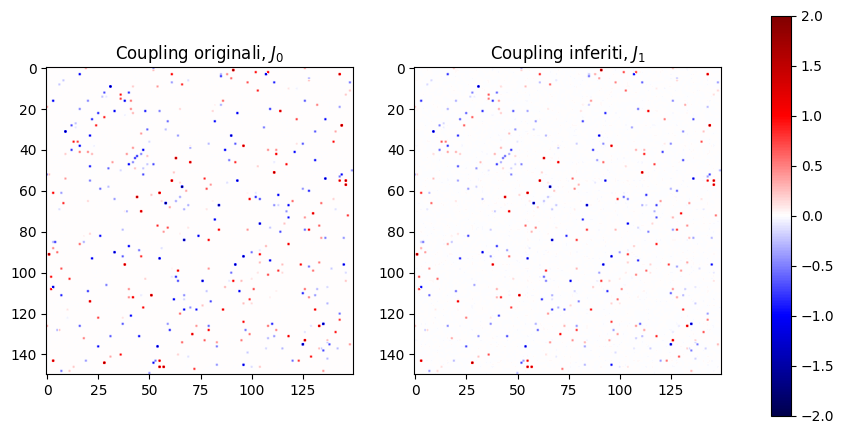

In [22]:
cov_inv = np.linalg.inv(cov_matrix)
np.fill_diagonal(cov_inv, 0)


if is_dis:
    fig, axs = plt.subplots(1,2, figsize=((10,10)))
    f1=axs[0].imshow(J0, cmap="seismic", vmin=-2, vmax=2)
    axs[0].set_title(r"Coupling originali, $J_0$")
    f2=axs[1].imshow(-cov_inv*T, cmap="seismic", vmin=-2, vmax=2)
    axs[1].set_title(r"Coupling inferiti, $J_1$")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
    fig.colorbar(f1, cax=cbar_ax)
    plt.show()
else:
    fig, axs = plt.subplots(1,2, figsize=((10,10)))
    f1=axs[0].imshow(J0, cmap="Reds", vmin=0, vmax=1)
    axs[0].set_title(r"Coupling originali, $J_0$")
    f2=axs[1].imshow(-cov_inv, cmap="Reds", vmin=0, vmax=1)
    axs[1].set_title(r"Coupling inferiti, $J_1$")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
    fig.colorbar(f1, cax=cbar_ax)
    plt.show()